<a href="https://colab.research.google.com/github/KangHwan-Cha/MyStudy/blob/main/TensorProject/category3D - German Traffic Signs(2022.11 new project)-training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


---

There are 5 questions in this exam with increasing difficulty from 1-5.
Please note that the weight of the grade for the question is relative
to its difficulty. So your Category 1 question will score significantly
less than your Category 5 question.

Don't use lambda layers in your model.
You do not need them to solve the question.
Lambda layers are not supported by the grading infrastructure.

You must use the Submit and Test button to submit your model
at least once in this category before you finally submit your exam,
otherwise you will score zero for this category.

---

BASIC DATASETS QUESTION

Create a classifier for the German Traffic Signs dataset that classifies 
images of traffic signs into 43 classes.

---

ABOUT THE DATASET

The dataset contains traffic sign boards from the streets captured into
image files. There are 43 unique classes in total. The images are of shape
(30,30,3).

---

INSTRUCTIONS

We have already divided the data for training and validation.

Complete the code in following functions:
1. preprocess()
2. solution_model()

Your code will fail to be graded if the following criteria are not met:
1. The input shape of your model must be (30,30,3), because the testing
   infrastructure expects inputs according to this specification.
2. The last layer of your model must be a Dense layer with 43 neurons
   activated by softmax since this dataset has 43 classes.

> HINT: Your neural network must have a validation accuracy of approximately
0.95 or above on the normalized validation dataset for top marks.

In [2]:
import urllib
import zipfile

import tensorflow as tf
from keras_preprocessing.image import ImageDataGenerator

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Reshape
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint



# This function downloads and extracts the dataset to the directory that
# contains this file.
# DO NOT CHANGE THIS CODE
# (unless you need to change https to http)
def download_and_extract_data():
    url = 'https://storage.googleapis.com/download.tensorflow.org/data/certificate/germantrafficsigns.zip'
    urllib.request.urlretrieve(url, 'germantrafficsigns.zip')
    with zipfile.ZipFile('germantrafficsigns.zip', 'r') as zip_ref:
        zip_ref.extractall()

# COMPLETE THE CODE IN THIS FUNCTION
def preprocess(image, label):
    # NORMALIZE YOUR IMAGES HERE (HINT: Rescale by 1/.255)
    image /= 255
    return image, label


# This function loads the data, normalizes and resizes the images, splits it into
# train and validation sets, defines the model, compiles it and finally
# trains the model. The trained model is returned from this function.

# COMPLETE THE CODE IN THIS FUNCTION.
def solution_model():
    # Downloads and extracts the dataset to the directory that
    # contains this file.
    download_and_extract_data()
    BATCH_SIZE = 32
    IMG_SIZE = 30

    # The following code reads the training and validation data from their
    # respective directories, resizes them into the specified image size
    # and splits them into batches. You must fill in the image_size
    # argument for both training and validation data.
    # HINT: Image size is a tuple
    train_ds = tf.keras.preprocessing.image_dataset_from_directory(
        directory='train/',
        label_mode='categorical',
        image_size=(IMG_SIZE,IMG_SIZE),
        batch_size = BATCH_SIZE)

    val_ds = tf.keras.preprocessing.image_dataset_from_directory(
        directory='validation/',
        label_mode='categorical',
        image_size=(IMG_SIZE,IMG_SIZE),
        batch_size = BATCH_SIZE)

    # Normalizes train and validation datasets using the
    # preprocess() function.
    # Also makes other calls, as evident from the code, to prepare them for
    # training.
    # Do not batch or resize the images in the dataset here since it's already
    # been done previously.

    train_ds = train_ds.map(
        preprocess, num_parallel_calls=tf.data.experimental.AUTOTUNE).prefetch(
        tf.data.experimental.AUTOTUNE)
    val_ds = val_ds.map(
        preprocess, num_parallel_calls=tf.data.experimental.AUTOTUNE)

    # Code to define the model
    model = tf.keras.models.Sequential([
        # ADD LAYERS OF THE MODEL HERE
        Conv2D(32, (3, 3), activation='relu', input_shape=(30, 30, 3)),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dropout(0.5),
        Dense(128, activation='relu'),        
        
        tf.keras.layers.Dense(43, activation=tf.nn.softmax)
    ])

    # Code to compile and train the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

    checkpoint_path = "tmp_checkpoint.ckpt"
    checkpoint = ModelCheckpoint(filepath=checkpoint_path,
                                 save_weights_only=True,
                                 save_best_only=True,
                                 monitor='val_loss',
                                 verbose=1)

    model.fit(train_ds,
              validation_data=val_ds,
              epochs=10,
              callbacks=[checkpoint])
    model.load_weights(checkpoint_path)
    return model


# Note that you'll need to save your model as a .h5 like this.
# When you press the Submit and Test button, your saved .h5 model will
# be sent to the testing infrastructure for scoring
# and the score will be returned to you.
if __name__ == '__main__':
    model = solution_model()
    model.save("mymodel.h5")

Found 31367 files belonging to 43 classes.
Found 7842 files belonging to 43 classes.
Epoch 1/10
981/981 [==============================] - ETA: 0s - loss: 2.1602 - acc: 0.3749
Epoch 1: val_loss improved from inf to 0.83949, saving model to tmp_checkpoint.ckpt
981/981 [==============================] - 22s 14ms/step - loss: 2.1602 - acc: 0.3749 - val_loss: 0.8395 - val_acc: 0.7791
Epoch 2/10
974/981 [============================>.] - ETA: 0s - loss: 0.7373 - acc: 0.7676
Epoch 2: val_loss improved from 0.83949 to 0.29373, saving model to tmp_checkpoint.ckpt
981/981 [==============================] - 14s 14ms/step - loss: 0.7360 - acc: 0.7680 - val_loss: 0.2937 - val_acc: 0.9183
Epoch 3/10
981/981 [==============================] - ETA: 0s - loss: 0.4434 - acc: 0.8608
Epoch 3: val_loss improved from 0.29373 to 0.19337, saving model to tmp_checkpoint.ckpt
981/981 [==============================] - 13s 14ms/step - loss: 0.4434 - acc: 0.8608 - val_loss: 0.1934 - val_acc: 0.9492
Epoch 4/10
97

In [15]:
import matplotlib.pyplot as plt

In [17]:
import os
TRAINING_DIR = os.getcwd()

Found 7842 images belonging to 43 classes.
(128, 150, 150, 3) (128, 43)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


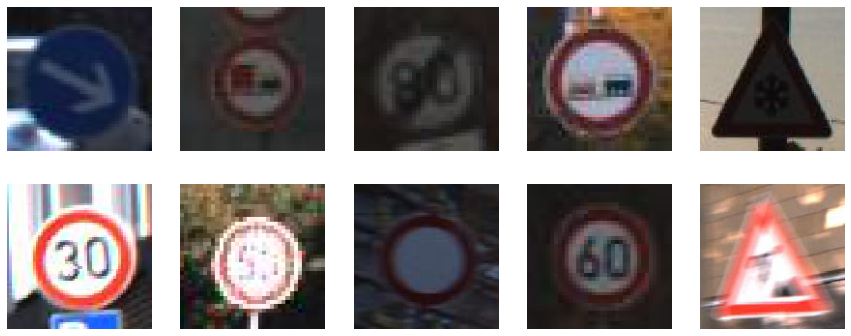

In [18]:
original_datagen = ImageDataGenerator(rescale=1./255)
original_generator = original_datagen.flow_from_directory(TRAINING_DIR, 
                                                          batch_size=128, 
                                                          target_size=(150, 150), 
                                                          class_mode='categorical'
                                                         )

for x, y in original_generator:
    print(x.shape, y.shape)
    print(y[0])
    
    fig, axes = plt.subplots(2, 5)
    fig.set_size_inches(15, 6)
    for i in range(10):
        axes[i//5, i%5].imshow(x[i])
        axes[i//5, i%5].axis('off')
    plt.show()
    break